In [1]:
from util import *
from glob import glob
import matplotlib.pyplot as plt
from shapely import wkt
pd.set_option("display.max_columns", None)

In [2]:
gdf = gpd.read_file(f"Shapefiles/Tasman_Transect_Intersects.shp")
gdf = enrich_df(gdf)
transect_metadata = get_transect_metadata(f"Shapefiles/Tasman_Transects.shp")
gdf

,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,geometry,Date,Year,YearsSinceBase,YearsUntilFuture
0,1,1,1,22/09/1969,57.951756,1.615363e+06,5.429684e+06,3.0,POINT (1615362.685 5429683.827),1969-09-22,1969,29.724846,130.275154
1,1,1,1,13/09/1985,53.148684,1.615367e+06,5.429686e+06,3.0,POINT (1615366.751 5429686.383),1985-09-13,1985,45.700205,114.299795
2,1,1,1,14/12/2006,51.329452,1.615368e+06,5.429687e+06,3.0,POINT (1615368.291 5429687.352),2006-12-14,2006,66.951403,93.048597
3,1,1,1,23/12/2014,45.834781,1.615373e+06,5.429690e+06,3.0,POINT (1615372.943 5429690.276),2014-12-23,2014,74.976044,85.023956
4,1,1,1,17/02/2018,47.865276,1.615371e+06,5.429689e+06,3.0,POINT (1615371.224 5429689.196),2018-02-17,2018,78.130048,81.869952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97540,10606,10606,1,04/06/2003,13.621824,1.577622e+06,5.513973e+06,3.0,POINT (1577621.540 5513973.049),2003-06-04,2003,63.422313,96.577687
97541,10606,10606,1,24/01/2009,20.875496,1.577628e+06,5.513977e+06,3.0,POINT (1577627.731 5513976.830),2009-01-24,2009,69.065024,90.934976
97542,10606,10606,1,25/04/2014,8.869320,1.577617e+06,5.513971e+06,3.0,POINT (1577617.485 5513970.571),2014-04-25,2014,74.313484,85.686516
97543,10606,10606,1,27/08/2019,11.840117,1.577620e+06,5.513972e+06,3.0,POINT (1577620.020 5513972.120),2019-08-27,2019,79.652293,80.347707


In [3]:
linear_models = fit(gdf, transect_metadata)
linear_models.loc[linear_models.slope > 0, "slope"] = pd.NA
rolled_slopes = linear_models.groupby("group").slope.rolling(10, min_periods=1).mean().dropna().reset_index(level=0)
linear_models.slope = rolled_slopes.slope
linear_models.dropna(inplace=True)
linear_models

/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

,TransectID,slope,intercept,group,r2_score,mae,mse,rmse
0,1,-0.216534,64.022364,0,0.902155,1.172325,1.747570,1.321957
1,2,-0.216534,41.750539,0,0.015446,8.455253,136.106684,11.666477
2,3,-0.216534,40.693254,0,0.020055,8.710532,143.758408,11.989929
3,4,-0.216534,40.018657,0,0.030984,8.526096,142.109986,11.920989
4,5,-0.216534,40.148470,0,0.034068,8.374658,134.291174,11.588407
...,...,...,...,...,...,...,...,...
10600,10601,-0.240247,25.351880,93,0.509147,7.354893,65.591078,8.098832
10601,10602,-0.252577,6.923238,93,0.751450,3.451812,17.096976,4.134849
10602,10603,-0.234630,16.384705,93,0.010799,1.574226,4.923344,2.218861
10603,10604,-0.218594,18.598745,93,0.217392,1.649792,4.413440,2.100819


In [4]:
results = predict(gdf, linear_models, transect_metadata)
results

,TransectID,slope,intercept,group,r2_score,mae,mse,rmse,BaselineID,Year,ocean_point,linear_model_point,linear_model_predicted_distance,linear_model_distance,sqrt_model_point,sqrt_model_predicted_distance,sqrt_model_distance,BH_model_point,BH_model_predicted_distance,BH_model_distance,Sunamura_model_point,Sunamura_model_predicted_distance,Sunamura_model_distance
0,1.0,-0.216534,64.022364,0.0,0.902155,1.172325,1.747570,1.321957,1,2100,POINT (1614941.7439699392 5429433.174118141),POINT (1615387.104603881 5429698.662339091),29.377002,18.488273,POINT (1615423.8887216786 5429720.590074165),-13.447020,61.312296,POINT (1615417.6237159101 5429716.85538118),-6.153308,54.018584,POINT (1615396.5050743662 5429704.266144177),18.432987,29.432289
1,2.0,-0.216534,41.750539,0.0,0.015446,8.455253,136.106684,11.666477,1,2100,POINT (1614942.574774903 5429441.334611649),POINT (1615411.5001166225 5429701.585235764),7.105178,36.303425,POINT (1615448.9439746533 5429722.366342168),-35.718845,79.127447,POINT (1615442.5666030974 5429718.826940945),-28.425133,71.833736,POINT (1615421.069188911 5429706.8960108785),-3.838838,47.247440
2,3.0,-0.216534,40.693254,0.0,0.020055,8.710532,143.758408,11.989929,1,2100,POINT (1614940.1371283624 5429444.885863939),POINT (1615417.7904346394 5429694.066465929),6.047892,38.742660,POINT (1615455.7585358836 5429713.8735398045),-36.776130,81.566682,POINT (1615449.2918761524 5429710.500034077),-29.482419,74.272970,POINT (1615427.4934814025 5429699.128319373),-4.896124,49.686675
3,4.0,-0.216534,40.018657,0.0,0.030984,8.526096,142.109986,11.920989,1,2100,POINT (1614938.7115073772 5429446.381908521),POINT (1615424.0563819825 5429686.465122399),5.373295,41.479083,POINT (1615462.4409113403 5429705.452612849),-37.450728,84.303105,POINT (1615455.9033263107 5429702.218697118),-30.157016,77.009393,POINT (1615433.8658502237 5429691.317524855),-5.570721,52.423098
4,5.0,-0.216534,40.148470,0.0,0.034068,8.374658,134.291174,11.588407,1,2100,POINT (1614938.3979087032 5429447.273386313),POINT (1615429.1203567297 5429678.08523878),5.503108,42.293862,POINT (1615467.8718723897 5429696.312057528),-37.320914,85.117884,POINT (1615461.2717829032 5429693.207698054),-30.027202,77.824172,POINT (1615439.0236112056 5429682.7432456035),-5.440907,53.237877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841,10601.0,-0.240247,25.351880,93.0,0.509147,7.354893,65.591078,8.098832,1,2100,POINT (1578177.3402526323 5513981.773674086),POINT (1577623.7941575723 5513915.081298086),-13.087568,57.549238,POINT (1577576.621530461 5513909.397842611),-60.601339,105.063008,POINT (1577588.518950604 5513910.831268346),-48.617879,93.079548,POINT (1577612.9318654146 5513913.772586708),-24.028414,68.490084
6842,10602.0,-0.252577,6.923238,93.0,0.751450,3.451812,17.096976,4.134849,1,2100,POINT (1578150.3645745357 5514057.870115565),POINT (1577599.9424045032 5513920.124150374),-33.489034,67.396260,POINT (1577551.484450759 5513907.997299435),-83.441349,117.348575,POINT (1577565.4750100311 5513911.498508498),-69.019345,102.926571,POINT (1577589.3304606623 5513917.468457114),-44.428232,78.335459
6843,10603.0,-0.234630,16.384705,93.0,0.010799,1.574226,4.923344,2.218861,1,2100,POINT (1578106.2768942881 5514127.091925634),POINT (1577606.7627126891 5513930.932063385),-21.156143,36.649894,POINT (1577563.5707227539 5513913.970513327),-67.559184,83.052935,POINT (1577573.6910690288 5513917.944786339),-56.686454,72.180205,POINT (1577596.5782649473 5513926.932617644),-32.097740,47.591491
6844,10604.0,-0.218594,18.598745,93.0,0.217392,1.649792,4.413440,2.100819,1,2100,POINT (1578076.2752890536 5514188.401856649),POINT (1577606.2910387814 5513939.452972265),-16.376239,31.846540,POINT (1577568.088093263 5513919.217016142),-59.607697,75.077998,POINT (1577574.8934735546 5513922.82180041),-51.906550,67.376851,POINT (1577596.6202312203 5513934.330381982),-27.319979,42.790281


In [5]:
results.rename(columns={"linear_model_distance": "HistoricRate", "sqrt_model_distance": "WD", "BH_model_distance": "BH", "Sunamura_model_distance": "Sunamura"}, inplace=True)
cols = ["HistoricRate", "WD", "BH", "Sunamura"]
cols

['HistoricRate', 'WD', 'BH', 'Sunamura']

In [6]:
results[cols].describe()

,HistoricRate,WD,BH,Sunamura
count,6846.000000,6846.000000,6846.000000,6846.000000
mean,18.202028,55.282818,53.732339,29.149925
std,30.520360,89.358714,30.520360,30.483792
min,-75.660506,-45.945069,-40.130196,-64.732209
25%,2.544546,9.018056,38.074857,13.509271
50%,7.874260,21.351759,43.404571,18.831240
75%,20.771131,58.408693,56.301442,31.723046
max,615.717361,1631.170418,651.247672,626.004074


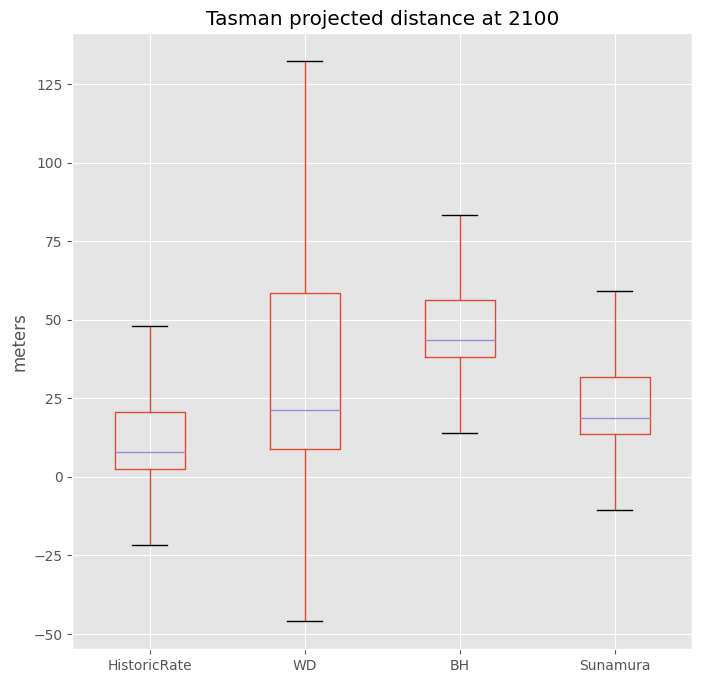

In [7]:
plt.style.use('ggplot')
results.boxplot(column=cols, figsize=(8,8), showfliers=False, ylabel="meters")
plt.title("Tasman projected distance at 2100")
plt.show()